# Simple Animations Using clear_output

Sometimes you want to clear the output area in the middle of a calculation.  This can be useful for doing simple animations. In terminals, there is the carriage-return (`'\r'`) for overwriting a single line, but the notebook frontend can clear the whole output area, not just a single line.

To clear output in the Notebook you can use the `clear_output()` function.  If you are clearing the output every frame of an animation, calling `clear_output()` will create noticeable flickering.  You can use `clear_output(wait=True)` to add the *clear_output* call to a queue.  When data becomes available to replace the existing output, the *clear_output* will be called immediately before the new data is added.  This avoids the flickering by not rendering the cleared output to the screen.

## Simple example

Here we show our progress iterating through a list:

In [1]:
import sys
import time

In [2]:
from IPython.display import display, clear_output
for i in range(10):
    time.sleep(0.25)
    clear_output(wait=True)
    print(i)
    sys.stdout.flush()

9


## AsyncResult.wait_interactive

The AsyncResult object has a special `wait_interactive()` method, which prints its progress interactively,
so you can watch as your parallel computation completes.

**This example assumes you have an IPython cluster running, which you can start from the [cluster panel](/#clusters)**

In [4]:
from IPython import parallel
rc = parallel.Client()
view = rc.load_balanced_view()

amr = view.map_async(time.sleep, [0.5]*100)

amr.wait_interactive()

 100/100 tasks finished after   12 s
done


## Matplotlib example

You can also use `clear_output()` to clear figures and plots.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

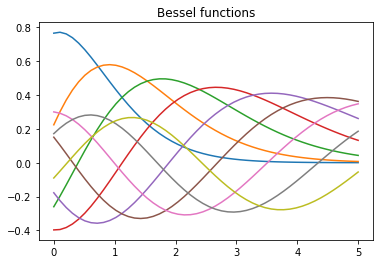

In [6]:
from scipy.special import jn
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()